<a href="https://www.kaggle.com/code/nigamshitij/mnist-image-classification-3-vs-7-only?scriptVersionId=177003115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [8]:
import fastbook
from fastai.vision.all import *
from fastbook import *

In [9]:
path = untar_data(URLs.MNIST_SAMPLE, c_key = 'archive', force_download = True)

In [10]:
Path.BASE_PATH = path

In [11]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [12]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [13]:
threes = (path/'train'/'3').ls().sorted()
threes
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [14]:
# data = ImageDataBunch.from_folder(path, train = 'training', valid = 'testing')

# il = (ImageList.from_folder(path)
#       .split_by_folder('training', 'testing')
#       .label_from_folder())

In [15]:
image3_path = threes[1]
image3 = Image.open(image3_path)
image3

In [16]:
array(image3)[4:10, 4:10]
# rows with index 4 to 10 (4 included, 10 not included)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [17]:
tensor(image3)[4:10, 4:10]
# tensor(image3)

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [18]:
image3_tensor = tensor(image3)
dataframe = pd.DataFrame(image3_tensor[4:15, 4:22])
dataframe.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [19]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

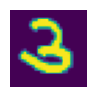

In [20]:
show_image(three_tensors[5])

In [21]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape # shape is the size of each axis

torch.Size([6131, 28, 28])

In [22]:
len(stacked_threes.shape) # rank - number of aces or dimensions

3

In [23]:
stacked_threes.ndim

3

<Axes: >

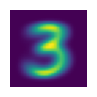

In [24]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

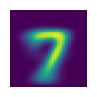

In [25]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

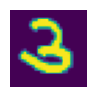

In [26]:
arbitrary_3 = stacked_threes[5]
show_image(arbitrary_3)

In [27]:
distance_3_abs = (arbitrary_3 - mean3).abs().mean()
distance_3_sqr = ((arbitrary_3 - mean3)**2).mean().sqrt()
distance_3_abs, distance_3_sqr

(tensor(0.1700), tensor(0.3016))

In [28]:
distance_7_abs = (arbitrary_3 - mean7).abs().mean()
distance_7_sqr = ((arbitrary_3 - mean7)**2).mean().sqrt()
distance_7_abs, distance_7_sqr

(tensor(0.2198), tensor(0.3829))

In [29]:
import torch.nn.functional as F

In [30]:
F.l1_loss(arbitrary_3.float(), mean7), F.mse_loss(arbitrary_3, mean7).sqrt()
# mse = mean squared error
# 

(tensor(0.2198), tensor(0.3829))

In [31]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tsr = tensor(data)

In [32]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
tsr

tensor([[1, 2, 3],
        [4, 5, 6]])

In [34]:
tsr[1]

tensor([4, 5, 6])

In [35]:
tsr[:,2]

tensor([3, 6])

In [36]:
tsr[0,0:2]

tensor([1, 2])

In [37]:
tsr + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [38]:
tsr.type()

'torch.LongTensor'

In [39]:
tsr*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [40]:
valid_3_tensor = torch.stack([tensor(Image.open(o)) 
                              for o in (path/'valid'/'3').ls()])

In [41]:
valid_3_tensor = valid_3_tensor.float()/255

In [42]:
valid_7_tensor = torch.stack([tensor(Image.open(o))
                             for o in (path/'valid'/'7').ls()])

In [43]:
valid_7_tensor = valid_7_tensor.float()/255

In [44]:
valid_3_tensor.shape, valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [45]:
def mnist_distance(a,b):
    distance = (a-b).abs().mean((-1,-2))
    return distance

In [46]:
mnist_distance(arbitrary_3, mean3)

tensor(0.1700)

In [47]:
# torch.mean??
valid_3_distance = mnist_distance(valid_3_tensor, mean3)
valid_3_distance, valid_3_distance.shape
# broadcasting

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [48]:
tensor([1,2,3]) + 1

tensor([2, 3, 4])

In [49]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [50]:
print("valid 3 tensor: " , valid_3_tensor.shape, "| mean3: ", mean3.shape)
print("valid 3 tensor - mean 3 :" , (valid_3_tensor-mean3).shape)
print("valid 3 tensor - mean 3 abs :", (valid_3_tensor - mean3).abs().shape)
print("valid 3 tensor - mean 3 abs mean:", (valid_3_tensor - mean3).abs().mean().shape, "||", (valid_3_tensor - mean3).abs().mean())
print("valid 3 tensor - mean 3 abs mean (-1,-2):", (valid_3_tensor - mean3).abs().mean((-1,-2)).shape, "||", (valid_3_tensor - mean3).abs().mean((-1,-2)))
# (valid_3_tensor - mean3).shape

valid 3 tensor:  torch.Size([1010, 28, 28]) | mean3:  torch.Size([28, 28])
valid 3 tensor - mean 3 : torch.Size([1010, 28, 28])
valid 3 tensor - mean 3 abs : torch.Size([1010, 28, 28])
valid 3 tensor - mean 3 abs mean: torch.Size([]) || tensor(0.1296)
valid 3 tensor - mean 3 abs mean (-1,-2): torch.Size([1010]) || tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287])


In [51]:
# torch.abs?
def is_3(x):
    check = mnist_distance(x, mean3) < mnist_distance(x, mean7)
    return check

In [52]:
print(is_3(arbitrary_3))
print(is_3(arbitrary_3).float())

tensor(True)
tensor(1.)


In [53]:
print(is_3(valid_3_tensor))

tensor([ True, False, False,  ...,  True,  True, False])


In [54]:
accuracy_3s = is_3(valid_3_tensor).float().mean()
accuracy_7s = (1 - is_3(valid_7_tensor).float().mean())
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [55]:
def pr_weight(image_vector, weights):
    return (image_vector * weights).sum()

In [56]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=7511db8359ae1b66a14de58aac142ae0330ed513c8ae28b2ada7db4681101247
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
Note: you may need to restart the kernel to use updated packages.


In [57]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
print("stacked_threes shape: ", stacked_threes.shape)
print("stacked_sevens shape: ", stacked_sevens.shape)
print("concat shape: ", torch.cat([stacked_threes, stacked_sevens]).shape)
print("train_x shape: ", train_x.shape)

stacked_threes shape:  torch.Size([6131, 28, 28])
stacked_sevens shape:  torch.Size([6265, 28, 28])
concat shape:  torch.Size([12396, 28, 28])
train_x shape:  torch.Size([12396, 784])


<Axes: >

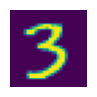

In [58]:
show_image(stacked_threes[1])

<Axes: >

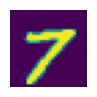

In [59]:
show_image(torch.cat([stacked_threes, stacked_sevens])[7000])

<Axes: >

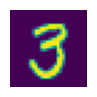

In [60]:
show_image(train_x[2].view(28,28))

In [61]:
# Tensor.view??

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [62]:
print("tensor three", tensor([1]*len(threes)).shape)
print("tensor seven shape", tensor([0]*len(sevens)).shape)
print("sumproduct shape", tensor([1]*len(threes) + [0]*len(sevens)).shape)
print("sumproduct unsqueeze -2 shape", tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(-2).shape)
print("sumproduct unsqueeze -1 shape", tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(-1).shape)
print("sumproduct unsqueeze 0 shape", tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(0).shape)
print("sumproduct unsqueeze 1 shape", tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1).shape)

tensor three torch.Size([6131])
tensor seven shape torch.Size([6265])
sumproduct shape torch.Size([12396])
sumproduct unsqueeze -2 shape torch.Size([1, 12396])
sumproduct unsqueeze -1 shape torch.Size([12396, 1])
sumproduct unsqueeze 0 shape torch.Size([1, 12396])
sumproduct unsqueeze 1 shape torch.Size([12396, 1])


In [63]:
# Image.open(threes[0])

In [64]:
# torch.unsqueeze??
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [65]:
dataset = list(zip(train_x, train_y))
x, y = dataset[0]
x.shape, y.shape, y

(torch.Size([784]), torch.Size([1]), tensor([1]))

In [66]:
# 
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tensor) + [0]*len(valid_7_tensor)).unsqueeze(1)
valid_dataset = list(zip(valid_x, valid_y))

In [67]:
valid_x.shape, valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [68]:
def initialize_parameters(size, standard = 1.0):
    return (torch.randn(size)*standard).requires_grad_()

In [69]:
weights = initialize_parameters((28*28, 1))
weights.shape

torch.Size([784, 1])

In [70]:
biases = initialize_parameters(1)
biases.shape

torch.Size([1])

In [71]:
# train_x[0].shape, weights.shape, biases.shape
(train_x[0] * weights.T).sum() + biases

tensor([-6.2330], grad_fn=<AddBackward0>)

In [72]:
def linear1(xbatch):
    return xbatch@weights + biases

predictions = linear1(train_x)
predictions

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [73]:
corrects = (predictions>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [74]:
corrects.float().mean().item()

0.5379961133003235

In [75]:
with torch.no_grad():
    weights[0] *= 1.0001

predictions = linear1(train_x)
((predictions>0.0).float() == train_y).float().mean().item()

0.5379961133003235

In [76]:
target_sample = tensor([1,0,1])
prediction_sample = tensor([0.9, 0.4, 0.2])

In [77]:
def mnist_loss(predictions, target):
    predictions = predictions.sigmoid()
    return torch.where(target == 1, 1-predictions, predictions).mean()

In [78]:
# torch.where??
torch.where(target_sample == 1, 1-prediction_sample, prediction_sample)
# lower prediction when prediction is correct
# lower is better

tensor([0.1000, 0.4000, 0.8000])

In [79]:
mnist_loss(prediction_sample, target_sample)

tensor(0.4460)

In [80]:
def sigmoid_f(x):
    return 1 / (1 + torch.exp(-x))

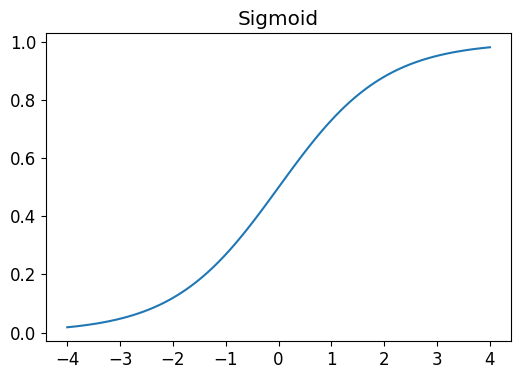

In [81]:
plot_function(torch.sigmoid, title = 'Sigmoid', min = -4, max = 4)

In [82]:
# coll = torch.rand(15).double()
coll = torch.arange(start = 0, end = 15)
# coll = range(15)
# print(coll.shape, coll2.shape)
dataloader = DataLoader(coll, batch_size = 5, shuffle = True)
list(dataloader)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [83]:
# range?? torch.arange?? torch.randn??
# L??

In [84]:
dataset = L(enumerate(string.ascii_lowercase))
dataset

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [85]:
dataloader = DataLoader(dataset, batch_size = 6, shuffle = True)
list(dataloader)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [86]:
# pseudo code

# learning_rate = 0.01

# for x, y in dataloader:
#     prediction = model(x)
#     loss = loss_function(prediction, y)
#     loss.backward()
#     parameters -= parameters.grad * learning_rate

In [87]:
initialize_parameters??

Signature: initialize_parameters(size, standard=1.0)
Docstring: <no docstring>
Source:   
def initialize_parameters(size, standard = 1.0):
    return (torch.randn(size)*standard).requires_grad_()
File:      /tmp/ipykernel_34/2437860536.py
Type:      function

In [88]:
weights = initialize_parameters((28*28, 1))
biases = initialize_parameters(1)
print(weights.shape, biases.shape)

torch.Size([784, 1]) torch.Size([1])


In [89]:
# dataloader = DataLoader(dataset)
dataset = list(zip(train_x, train_y))
x, y = dataset[0]
x.shape, y.shape, y

(torch.Size([784]), torch.Size([1]), tensor([1]))

In [90]:
dataloader = DataLoader(dataset, batch_size = 256)
xbatch, ybatch = first(dataloader)
xbatch.shape, ybatch.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [91]:
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tensor) + [0]*len(valid_7_tensor)).unsqueeze(1)
valid_dataset = list(zip(valid_x, valid_y))

In [92]:
validation_dataloader = DataLoader(valid_dataset, batch_size = 256)

In [93]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [94]:
predictions = linear1(batch)
predictions

tensor([[11.6180],
        [ 9.0489],
        [-2.4524],
        [-2.5197]], grad_fn=<AddBackward0>)

In [95]:
loss = mnist_loss(predictions, train_y[:4])
loss

tensor(0.4616, grad_fn=<MeanBackward0>)

In [96]:
loss.backward()
weights.grad.shape, weights.grad.mean(), biases.grad

(torch.Size([784, 1]), tensor(-0.0057), tensor([-0.0355]))

In [97]:
def calculate_gradient(xbatch, ybatch, model):
    predictions = model(xbatch)
    loss = mnist_loss(predictions, ybatch)
    loss.backward()

In [98]:
calculate_gradient(batch, train_y[:4], linear1)
weights.grad.mean(), biases.grad

(tensor(-0.0113), tensor([-0.0710]))

In [99]:
weights.grad.zero_()
biases.grad.zero_()

tensor([0.])

In [100]:
def train_epoch(model, learning_rate, parameters):
    for xbatch, ybatch in dataloader:
        calculate_gradient(xbatch, ybatch, model)
        for p in parameters:
            p.data -= p.grad * learning_rate
            p.grad.zero_()

In [101]:
(predictions>0.0).float() == train_y[:4]

tensor([[ True],
        [ True],
        [False],
        [False]])

In [102]:
def batch_accuracy(xbatch, ybatch):
    predictions = xbatch.sigmoid()
    correct = (predictions>0.5) == ybatch
    return correct.float().mean()

In [103]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [104]:
def validate_epoch(model):
    accuracy = [batch_accuracy(model(xbatch), ybatch) for xbatch, ybatch in validation_dataloader]
    return round(torch.stack(accuracy).mean().item(), 4)

In [105]:
validate_epoch(linear1)

0.548

In [106]:
learning_rate = 1
parameters = weights, biases
train_epoch(linear1, learning_rate, parameters)
validate_epoch(linear1)

0.6292

In [107]:
for i in range(20):
    train_epoch(linear1, learning_rate, parameters)
    print(validate_epoch(linear1), end = '')

0.81280.9130.94420.95590.96230.96670.96910.97060.9720.9740.97450.9750.9760.97650.97650.9770.97740.97740.97740.9774

In [108]:
# linear1??
# initialize_parameters??

In [109]:
linear_model = nn.Linear(28*28, 1)
weights, biases = linear_model.parameters()
weights.shape, biases.shape

(torch.Size([1, 784]), torch.Size([1]))

In [110]:
learning_rate = 0.01

class BasicOptimizer:
    
    def __init__(self, parameters, learning_rate):
        self.parameters = list(parameters)
        self.learning_rate = learning_rate

    def step(self, *args, **kwargs):
        for p in self.parameters:
            p.data -= p.grad.data * self.learning_rate
    
    def zero_grad(self, *args, **kwargs):
        for p in self.parameters:
            p.grad = None

In [111]:
optimizer = BasicOptimizer(linear_model.parameters(), learning_rate)

In [112]:
def train_epoch(model):
    for xbatch, ybatch in dataloader:
        calculate_gradient(xbatch, ybatch, model)
        optimizer.step()
        optimizer.zero_grad()

In [113]:
validate_epoch(linear_model)

0.3568

In [114]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = '')

In [115]:
train_model(linear_model, 20)

0.91740.92330.94330.95010.95690.95990.96030.96130.96130.96180.96180.96180.96230.96230.96330.96420.96420.96470.96470.9652

In [116]:
learning_rate = 0.1
linear_model = nn.Linear(28*28, 1)
optimizer = SGD(linear_model.parameters(), learning_rate)
train_model(linear_model, 20)

0.54740.87690.93550.9570.96280.96330.96670.96720.96910.97010.97010.97110.97060.97110.97210.97210.97210.97210.97210.9726

In [118]:
# dataloaders = dataLoaders(data)